In [509]:
import numpy as np
import pandas as pd

In [510]:
math = [20, 23, 29, 22, 50, 43, 35]
rus = [70, 65, 58, 90, 45, 57, 50]

In [511]:
df = pd.DataFrame({"rus":rus, "math":math})
df

,rus,math
0,70,20
1,65,23
2,58,29
3,90,22
4,45,50
5,57,43
6,50,35


In [512]:
forty = df[df.rus > 40]["math"]
full = df["math"].count()
cut = forty.count() / full
display(forty, full, cut)

0    20
1    23
2    29
3    22
4    50
5    43
6    35
Name: math, dtype: int64

7

1.0

In [513]:
df.math.mean()

31.714285714285715

In [514]:
df.rus.mean()

62.142857142857146

In [515]:
df.rus.median()

58.0

In [516]:
df.math.median()

29.0

<img src="MAT_6_unit_10.png" width="400px"/>

In [517]:
print(( sum([(a - df.math.mean())**2 for a in df.math])/len(df.math) )**0.5)

10.606120681868907


<img src="MAT_6_unit_11.png" width="400px"/>

In [518]:
print(( sum([(a - df.math.mean())**2 for a in df.math])/(len(df.math)-1) )**0.5)

11.455919659202191


In [519]:
print(( sum([(a - df.rus.mean())**2 for a in df.rus])/len(df.rus) )**0.5)
print(( sum([(a - df.rus.mean())**2 for a in df.rus])/(len(df.rus)-1) )**0.5)

13.788489728015605
14.89327109165491


In [520]:
np.corrcoef(rus, math)

array([[ 1.        , -0.76948014],
       [-0.76948014,  1.        ]])

In [521]:
1-0.76948014

0.23051986000000002

<h2><b>5.5. Практика. Готовые рецепты</b></h2>

В датасете framingham.csv представлены данные, которые группа ученых из Фрамингема (США) использовала для выявления риска заболевания ишемической болезнью сердца в течение 10 лет.

Демографические данные: 

    sex (male): пол, мужчина (1) или женщина (0) 

    age: возраст 
    
    education: уровень образования (0-4: школа-колледж)
    
Поведенческие данные: 

    currentSmoker: курильщик (1) или нет (0)

    cigsPerDay: количество выкуриваемых сигарет в день (шт.)

Медицинская история:

    BPMeds: принимает ли пациент препараты для регулировки артериального давления (0 - нет, 1 - да)

    prevalentStroke: случался ли у пациента сердечный приступ (0 - нет, 1 - да)

    prevalentHyp: страдает ли пациент гипертонией (0 - нет, 1 - да)

    diabetes: страдает ли пациент диабетом (0 - нет, 1 - да)

Физическое состояние:

    totChol: уровень холестерина

    sysBP: систолическое (верхнее) артериальное давление 

    diaBP: диастолическое (нижнее) артериальное давление 

    BMI: индекс массы тела - масса (кг) / рост^2 (в метрах)

    heartRate: пульс

    glucose: уровень глюкозы

Целевая переменная (на которую авторы строили регрессию):

    TenYearCHD: риск заболевания ишемической болезнью сердца в течение 10 лет

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline

In [523]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [524]:
dbs = df[df["diabetes"] == 1]
print("Найдите общее количество пациентов с диабетом:")
gr = dbs.value_counts()
drp = dbs.dropna()
drp

Найдите общее количество пациентов с диабетом:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
56,0,54,1.0,1,9.0,0.0,0,0,1,266.0,114.0,76.0,17.61,88.0,55.0,0
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
4154,1,52,2.0,0,0.0,0.0,0,1,1,269.0,157.5,83.0,26.60,70.0,80.0,0
4203,1,63,1.0,1,10.0,0.0,0,0,1,240.0,146.0,84.0,30.48,75.0,120.0,0
4215,0,63,1.0,0,0.0,0.0,0,1,1,236.0,155.0,82.0,39.17,78.0,79.0,0


In [525]:
df["male"].value_counts()

0    2420
1    1820
Name: male, dtype: int64

In [526]:
print("Найдите долю диабетиков среди всех пациентов:")
dbs["male"].count()/df.shape

Найдите долю диабетиков среди всех пациентов:


array([0.02570755, 6.8125    ])

In [527]:
maleDbs = dbs[dbs["male"] == 1]
riskDbs = drp["TenYearCHD"].value_counts()
riskDbs

0    64
1    35
Name: TenYearCHD, dtype: int64

In [528]:
print("Найдите долю пациентов группы риска среди пациентов с диабетом:")
riskDbs[1]/drp.shape

Найдите долю пациентов группы риска среди пациентов с диабетом:


array([0.35353535, 2.1875    ])

In [529]:
riskDbs[0]/drp.shape

array([0.64646465, 4.        ])

In [530]:
nodbs = df[df["diabetes"] == 0]
nodrp = nodbs.dropna()
nodrp

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [531]:
riskNoDbs = nodrp["TenYearCHD"].value_counts()
riskNoDbs

0    3037
1     522
Name: TenYearCHD, dtype: int64

In [532]:
print("Найдите долю пациентов группы риска среди пациентов без диабета:")
riskNoDbs[1]/nodrp.shape

Найдите долю пациентов группы риска среди пациентов без диабета:


array([ 0.14667041, 32.625     ])

In [533]:
riskGr = df[df["TenYearCHD"] == 1]
riskGr.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1


In [534]:
dbsRisk = riskGr[riskGr["diabetes"] == 1]
dbsRisk.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
247,0,40,2.0,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.19,61.0,NaN,1
284,1,68,1.0,0,0.0,0.0,0,1,1,164.0,142.0,85.0,30.28,70.0,120.0,1
294,0,47,1.0,1,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1
311,1,62,1.0,1,20.0,0.0,0,1,1,194.0,151.5,88.0,21.61,75.0,105.0,1


In [535]:
print("Найдите долю диабетиков среди пациентов группы риска:")
dbsRisk["diabetes"].count()/riskGr.shape

Найдите долю диабетиков среди пациентов группы риска:


array([0.0621118, 2.5      ])

In [536]:
noriskGr = df[df["TenYearCHD"] == 0]
noriskGr.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [537]:
dbsNoRisk = noriskGr[noriskGr["diabetes"] == 1]
dbsNoRisk.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
56,0,54,1.0,1,9.0,0.0,0,0,1,266.0,114.0,76.0,17.61,88.0,55.0,0
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
249,0,60,1.0,1,20.0,0.0,0,0,1,180.0,200.0,122.5,44.27,88.0,150.0,0


In [538]:
print("Найдите долю диабетиков среди пациентов не из группы риска:")
dbsNoRisk["diabetes"].count()/noriskGr.shape

Найдите долю диабетиков среди пациентов не из группы риска:


array([0.01918799, 4.3125    ])

In [539]:
print("Найдите среднее и медианное значения систолического давления среди пациентов-диабетиков:")
drp["sysBP"].describe()

Найдите среднее и медианное значения систолического давления среди пациентов-диабетиков:


count     99.000000
mean     145.949495
std       28.492077
min       85.500000
25%      127.250000
50%      142.000000
75%      159.750000
max      215.000000
Name: sysBP, dtype: float64

In [540]:
df.diabetes.value_counts()

0    4131
1     109
Name: diabetes, dtype: int64

In [541]:
grpd = df.groupby("diabetes")
grpd.mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
diabetes,,,,,,,,,,,,,,,
0,0.427984,49.439119,1.985853,0.497700,9.078011,0.028186,0.005810,0.304769,236.406908,131.956427,82.800533,25.743520,75.783293,79.487323,0.146212
1,0.477064,54.926606,1.735849,0.357798,6.293578,0.084112,0.009174,0.532110,247.759259,147.444954,86.582569,28.003178,79.504587,170.333333,0.366972


In [542]:
inrisk = df[df["TenYearCHD"] == 1]
corr = inrisk.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_81229/938987888.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.00,-0.11,0.08,0.29,0.36,-0.12,-0.02,-0.10,0.01,-0.13,-0.11,0.00,-0.03,-0.07,-0.01,nan
age,-0.11,1.00,-0.15,-0.31,-0.27,0.12,0.11,0.27,0.06,0.06,0.32,0.08,0.06,-0.02,0.10,nan
education,0.08,-0.15,1.00,0.02,0.05,0.00,-0.09,-0.07,-0.07,0.09,-0.09,0.02,-0.11,-0.03,-0.02,nan
currentSmoker,0.29,-0.31,0.02,1.00,0.79,-0.11,-0.04,-0.17,-0.09,-0.06,-0.16,-0.09,-0.14,0.11,-0.09,nan
cigsPerDay,0.36,-0.27,0.05,0.79,1.00,-0.11,-0.06,-0.14,-0.07,-0.05,-0.13,-0.08,-0.11,0.12,-0.07,nan
BPMeds,-0.12,0.12,0.00,-0.11,-0.11,1.00,0.02,0.26,0.09,0.09,0.28,0.19,0.04,0.10,0.12,nan
prevalentStroke,-0.02,0.11,-0.09,-0.04,-0.06,0.02,1.00,0.11,0.02,-0.03,0.05,0.04,0.00,-0.01,0.01,nan
prevalentHyp,-0.10,0.27,-0.07,-0.17,-0.14,0.26,0.11,1.00,0.07,0.09,0.67,0.56,0.25,0.15,0.10,nan
diabetes,0.01,0.06,-0.07,-0.09,-0.07,0.09,0.02,0.07,1.00,0.07,0.10,0.02,0.09,0.08,0.77,nan
totChol,-0.13,0.06,0.09,-0.06,-0.05,0.09,-0.03,0.09,0.07,1.00,0.12,0.08,0.06,0.07,0.09,nan


<AxesSubplot:>

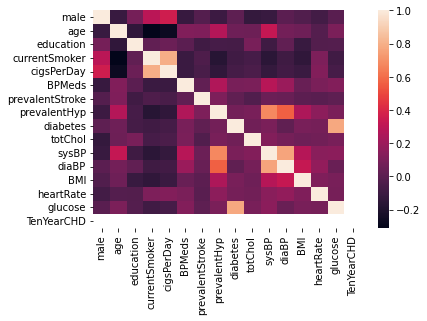

In [543]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:>

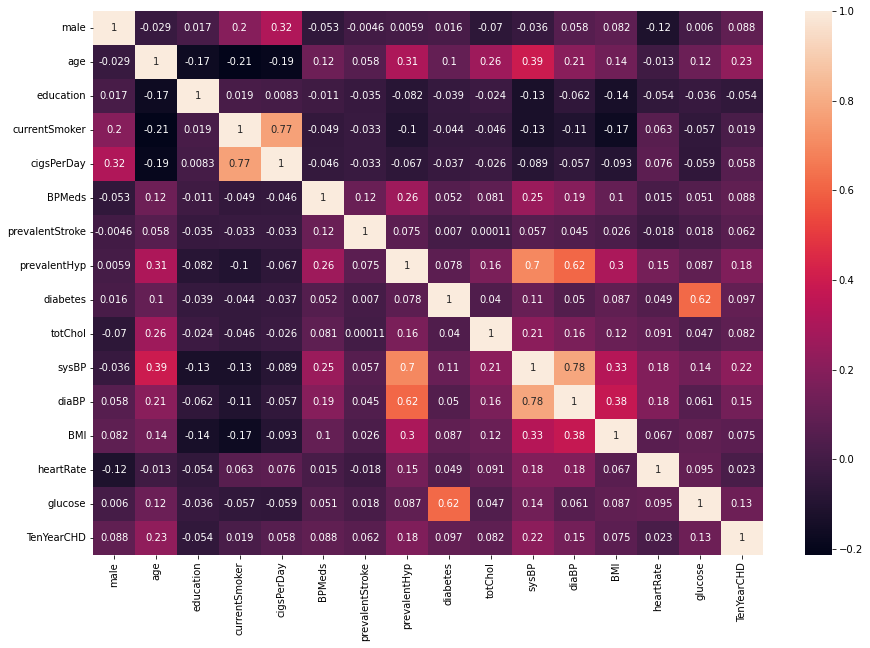

In [544]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

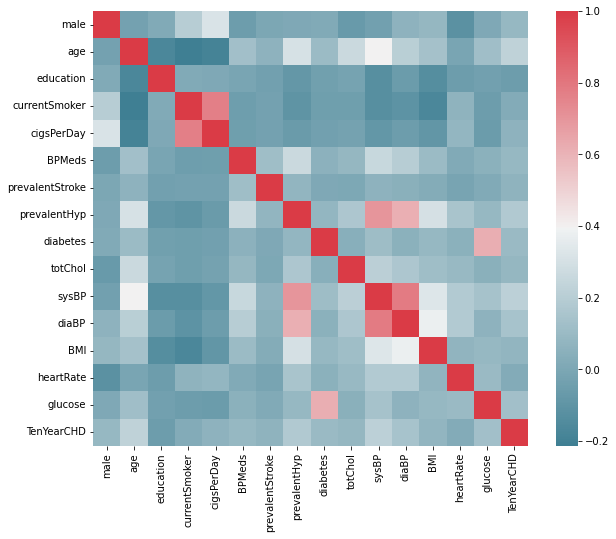

In [545]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<h2><b>5.7. Доверительный интервал для среднего</b></h2>

<h4>РАСЧЕТ Z-КРИТИЧЕСКОГО С ПОМОЩЬЮ PYTHON</h4>
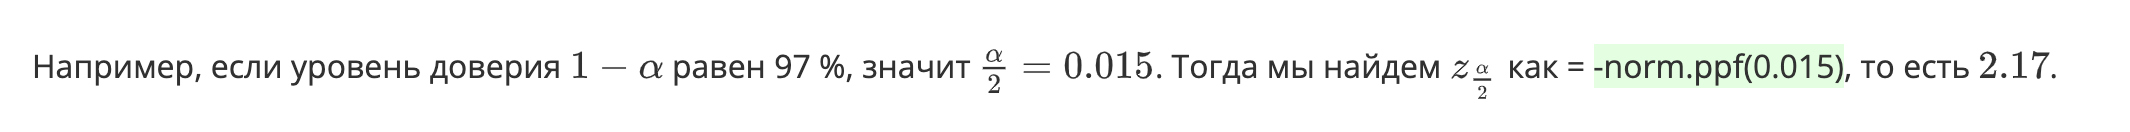

In [546]:
from scipy.stats import norm 
alpha = 0.03
value = -norm.ppf(alpha/2)
print(value) # 2.17

2.1700903775845606


In [547]:
alpha = 0.07
-norm.ppf(alpha/2)

1.8119106729525978

<h5>Задача</h5>
Попробуем решить задачу, используя эту формулу.
Была опрошена случайная выборка из 36 жителей региона об их затратах на продукты питания за последний месяц. Выборочное среднее оказалось 16 100 рублей.
Допустим, известно, что стандартное отклонение расходов равно 12 000 рублей.
Нам нужно найти 95 %-ный доверительный интервал для истинных средних расходов жителя данного региона на продукты питания в месяц.
<br><br>
<img src="image_0.png" width="1000px"/>

In [549]:
lo = 37 - 1.96 * (3.4 / (200**0.5))
hi = 37 + 1.96 * (3.4 / (200**0.5))
print(lo, hi)

36.52878404101728 37.47121595898272


In [550]:
alpha = 0.01
Z = -norm.ppf(alpha/2)
lo = 7.6 - Z * (0.8 / (60**0.5))
hi = 7.6 + Z * (0.8 / (60**0.5))
print(lo, hi)

7.333969493458188 7.8660305065418115


In [551]:
from scipy.stats import t
# 0.95 - доверительный интервал, 100-1 число степеней свободы
# для двустороннего t-теста
value = t.ppf((1 + 0.95)/2, 100-1)
print(value) # 1.98

1.9842169515086827


<img src="image_2.png" width="70%"/>

In [552]:
from scipy.stats import norm
from scipy.stats import t
import math

def confidence_interval_norm(alpha, sigma, n, mean):
    value = -norm.ppf(alpha / 2) * sigma / math.sqrt(n)
    return mean - value, mean + value

def confidence_interval_t(alpha, s, n, mean):
    value = -t.ppf(alpha / 2, n - 1) * s / math.sqrt(n)
    return mean - value, mean + value

<h2><b>5.9. Практика по доверительным интервалам</b></h2>

In [559]:
alpha = 0.1
print(confidence_interval_t(alpha, 400, 15, 2000))

(1818.092671377004, 2181.907328622996)


In [560]:
alpha = 0.05
print(confidence_interval_t(alpha, 400, 15, 2000))

(1778.4873833741433, 2221.5126166258565)


In [561]:
alpha = 0.01
print(confidence_interval_t(alpha, 400, 15, 2000))

(1692.553004440083, 2307.446995559917)


In [563]:
alpha = 0.01
print(confidence_interval_norm(alpha, 1150, 250, 3540))

(3352.6537883505453, 3727.3462116494547)


<h2><b>5.10. Доверительный интервал для пропорции</b></h2>

<img src="image_1.png" width="800px"/>

In [568]:
allCmts = 189
positive = 132
negative = allCmts - positive
p = positive/allCmts
p

0.6984126984126984

In [567]:
alpha = 0.1
Z = -norm.ppf(alpha/2)
lo = p - Z * ((p*(1-p)/allCmts)**0.5)
hi = p + Z * ((p*(1-p)/allCmts)**0.5)
print(lo, hi)


0.6435017501091355 0.7533236467162613
